In [59]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_rel

In [2]:
current_dir = os.getcwd()
dataset_dir = os.path.join(current_dir, 'datasets')

In [3]:
ghg_file_path = os.path.join(dataset_dir, 'DATASET_GHG_EMISSIONS.csv')
co2_file_path = os.path.join(dataset_dir, 'DATASET_CO2_EMISSIONS.csv')
ch4_file_path = os.path.join(dataset_dir, 'DATASET_CH4_EMISSIONS.csv')
n2o_file_path = os.path.join(dataset_dir, 'DATASET_N2O_EMISSIONS.csv')

ghg_df = pd.read_csv(ghg_file_path)
co2_df = pd.read_csv(co2_file_path)
ch4_df = pd.read_csv(ch4_file_path)
n2o_df = pd.read_csv(n2o_file_path)

co2_df = co2_df.fillna(0)
ch4_df = ch4_df.fillna(0)
n2o_df = n2o_df.fillna(0)

In [4]:
dfs = [co2_df, ch4_df, n2o_df]
for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].replace(' ', 0);
        if df[col].mean() < 1:
            df.drop(columns=col)
        else:
            print(f"Passed {col}")

Passed Year
Passed [1] Energía
Passed [1A] Actividades de quema del combustible
Passed [1A1] Industrias de la energía
Passed [1A1a] Actividad principal producción de electricidad y calor
Passed [1A1b] Refinación del petróleo
Passed [1A1c] Manufactura de combustibles sólidos y otras industrias de la energía
Passed [1A2] Industrias manufactura y de la construcción
Passed [1A2a] Hierro y acero
Passed [1A2b] Metales no ferrosos
Passed [1A2c] Sustancias químicas
Passed [1A2d] Pulpa, papel e imprenta
Passed [1A2e] Procesamiento de alimentos, bebidas y tabaco
Passed [1A2g] Equipo de transporte
Passed [1A2i] Minería (con excepción de combustibles) y cantería
Passed [1A2k] Construcción
Passed [1A2m] Industria no especificada
Passed [1A3] Transporte
Passed [1A3a] Aviación civil
Passed [1A3b] Autotransporte
Passed [1A3c] Ferrocarriles
Passed [1A3d] Navegación marítima y fluvial
Passed [1A4] Otros sectores
Passed [1A4a] Comercial/institucional
Passed [1A4b] Residencial
Passed [1A4c] Agropecuario/s

In [5]:
ghg_df

,Unnamed: 0,CO2,CH4,N2O
0,1990,319999.8455,117840.4201,28337.97300
1,1991,329716.3529,119392.8666,27177.03342
2,1992,333049.7117,117998.4615,27988.13134
3,1993,338075.1071,118275.3551,26219.01096
4,1994,360853.3477,124026.1810,28335.69607
5,1995,347496.6454,127038.4565,28258.99299
6,1996,359553.2713,131254.5972,27629.11144
7,1997,375317.2362,138365.1189,29935.23041
8,1998,393944.4869,143331.7863,30056.78095
9,1999,386967.0070,136486.7789,31511.02751


In [6]:
co2_df

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.8455
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.3529
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.7117
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.1071
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.3477
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.6454
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,359553.2713
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,375317.2362
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,393944.4869
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,386967.0070


In [7]:
ch4_df

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,15757.71420,2933.343959,92.051436,62.745182,11.131438,18.174816,101.771494,3.683582,1.876280,...,0.000000,0.161280,801.997327,0.000000,801.997327,9877.340649,4552.253721,5325.086928,0.0,117840.4201
1,1991,16023.51449,2990.193435,94.450598,64.183908,8.525793,21.740897,110.194678,3.494652,1.505000,...,416.962626,0.670803,831.253464,0.000000,831.253464,10545.705060,4536.149305,6009.555757,0.0,119392.8666
2,1992,16005.65055,3078.457997,92.136128,62.725316,8.623216,20.787596,104.737939,2.589202,1.426544,...,766.796062,0.850428,861.648475,0.000000,861.648475,11254.970620,4518.925083,6736.045538,0.0,117998.4615
3,1993,16892.61140,2974.337042,88.495738,63.421282,8.212379,16.862076,113.725531,2.395610,1.371272,...,1072.484553,1.015339,893.206595,0.000032,893.206563,12211.629850,4500.525077,7711.104774,0.0,118275.3551
4,1994,16871.52190,2989.376037,102.281957,75.804244,9.681912,16.795801,102.219802,2.442496,1.375188,...,1348.661829,96.304355,925.987245,0.000145,925.987100,12920.004150,4513.064175,8406.939976,0.0,124026.1810
5,1995,18489.59557,2989.528153,91.195854,67.967230,9.113256,14.115369,110.272764,2.416008,1.394484,...,1620.551634,96.585474,960.027732,0.000145,960.027587,13881.321470,4753.535816,9127.785650,0.0,127038.4565
6,1996,24314.06592,3006.832371,106.874985,85.018632,8.973336,12.883016,97.633170,3.731692,1.849022,...,1873.022249,97.119974,996.835188,0.000145,996.835043,14414.315010,4505.683689,9908.631322,0.0,131254.5972
7,1997,29098.55760,3042.846120,115.187690,94.647155,8.589834,11.950701,104.909597,3.932082,1.802898,...,2101.691247,97.635054,1035.113666,0.000145,1035.113521,15348.892010,4594.895648,10753.996360,0.0,138365.1189
8,1998,30985.05250,3081.043433,131.920736,106.561622,8.933299,16.425815,103.335651,3.432313,1.917295,...,2310.763051,98.088459,1074.924715,0.000145,1074.924570,15786.028360,4604.450669,11181.577690,0.0,143331.7863
9,1999,27077.32433,3100.749568,142.293441,119.226977,10.148344,12.918120,82.516272,3.320648,1.908806,...,2513.262727,98.710844,1085.155286,0.000145,1085.155140,15176.633960,4613.552715,10563.081250,0.0,136486.7789


In [8]:
n2o_df

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,2888.179063,2879.060741,187.539901,139.850236,20.203821,27.485844,141.640670,5.648170,2.920578,...,0.0,0.114480,175.161504,0.000000,175.161504,3489.835674,3489.835674,0.0,0.0,28337.97300
1,1991,3024.491720,3015.086937,192.367568,142.699466,15.301407,34.366695,150.656429,5.322604,2.286950,...,0.0,0.476151,181.551237,0.000000,181.551237,3552.453155,3552.453155,0.0,0.0,27177.03342
2,1992,3049.539674,3040.044037,188.290264,141.218844,15.373339,31.698081,144.317686,3.630911,2.089393,...,0.0,0.603652,188.189708,0.000000,188.189708,3607.401375,3607.401375,0.0,0.0,27988.13134
3,1993,3097.756590,3085.957540,188.765320,150.285020,14.551316,23.928984,157.297449,3.707575,2.066814,...,0.0,0.720710,195.082711,0.000509,195.082202,3637.547649,3637.547649,0.0,0.0,26219.01096
4,1994,3217.366806,3205.826401,222.342218,181.142773,17.295293,23.904152,142.912759,3.918264,2.100572,...,0.0,68.358895,202.243979,0.002291,202.241688,3667.604433,3667.604433,0.0,0.0,28335.69607
5,1995,3098.775245,3082.557305,205.716386,169.923639,16.205052,19.587695,151.132174,3.968004,2.116608,...,0.0,68.558439,209.678646,0.002291,209.676355,3638.602121,3638.602121,0.0,0.0,28258.99299
6,1996,3160.466195,3131.121226,236.766288,203.086232,15.874674,17.805382,136.149877,5.479132,2.674234,...,0.0,68.937838,217.717637,0.002291,217.715346,3623.018774,3623.018774,0.0,0.0,27629.11144
7,1997,3306.356742,3264.715574,251.866007,221.176588,14.782701,15.906718,146.094494,5.726663,2.575169,...,0.0,69.303454,226.077909,0.002291,226.075618,3717.246226,3717.246226,0.0,0.0,29935.23041
8,1998,3372.793291,3327.286193,281.448396,242.073757,15.269867,24.104772,144.053120,5.253031,2.749264,...,0.0,69.625290,234.772905,0.002291,234.770613,3754.891583,3754.891583,0.0,0.0,30056.78095
9,1999,3305.395792,3272.178200,293.389041,257.973185,17.524234,17.891622,116.681297,4.900660,2.635177,...,0.0,70.067072,237.007329,0.002291,237.005037,3775.739494,3775.739494,0.0,0.0,31511.02751


In [9]:
co2_df_zeros = co2_df.copy()
co2_df_absolute = co2_df.copy()
ex = (co2_df < 0)
co2_df_zeros[ex] = 0
co2_df_absolute[ex] = co2_df_absolute[ex].abs()
co2_df.columns[ex.any() == True]

Index(['[3] Agricultura, silvicultura y otros usos de la tierra',
       '[3B] Tierra', '[3B1] Tierra forestales',
       '[3B1a] Tierras forestales que permanecen como tal',
       '[3B1b] Tierras convertidas a tierras forestales',
       '[3B2] Tierra de cultivo',
       '[3B2a] Tierras de cultivo que permanecen como tal',
       '[3B3a] Praderas que permanecen como tal', '[3D] Otros',
       '[3D1] Productos de madera recolectada'],
      dtype='object')

In [10]:
co2_df_zeros

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.8455
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.3529
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.7117
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.1071
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.3477
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.6454
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,359553.2713
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,375317.2362
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,393944.4869
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,386967.0070


In [11]:
co2_df_absolute

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.8455
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.3529
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.7117
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.1071
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.3477
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.6454
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,359553.2713
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,375317.2362
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,393944.4869
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,386967.0070


In [12]:
co2_df_zeros = co2_df_zeros.drop(columns='Total')
co2_df_zeros.loc[:, 'Total'] = co2_df_zeros[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
co2_df_zeros

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.845435
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.352941
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.711791
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.107079
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.347739
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.645328
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,359916.255860
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,380543.586699
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,401618.538463
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,397644.952468


In [13]:
co2_df_absolute = co2_df_absolute.drop(columns='Total')
co2_df_absolute.loc[:, 'Total'] = co2_df_absolute[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
co2_df_absolute

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.845435
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.352941
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.711791
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.107079
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.347739
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.645328
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,360279.240381
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,385769.937279
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,409292.589987
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,408322.897928


In [14]:
test_d = []
predict_d = []
result_d = {"Model": [], "Params": [], "MSE": [], "Dataset": []}
data_title = ""

In [15]:
def plot_result_df(title, y_test, y_pred):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.plot(y_test, 'o', ls='-', ms=4, label='Test values')
    ax.plot(y_pred, 'o', ls='-', ms=4, label='Predicted values')
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
def append_row_result_df(model, params, mse):
    result_d["Model"].append(model)
    result_d["Params"].append(params)
    result_d["MSE"].append(mse)
    result_d["Dataset"].append(data_title)
    
def build_result_df(data):
    return pd.DataFrame(data=data)

In [17]:
max_iter = np.arange(100, 10100, 100)
alpha = np.arange(0, 10, 0.25)
activation = ['identity', 'relu']
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

def run_linear_regression(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Linear Regression")
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    append_row_result_df("Linear Regression", regressor.get_params(), mse_score)
    test_d.append(y_test)
    predict_d.append(y_pred)
    # print(f"Mean Squared Error: {mse_score}")
    
def run_lasso_regressor(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Lasso LARS Regression")
    for iterations in max_iter:
        for a in alpha:
            regressor = Lasso(alpha=a, max_iter=iterations)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            mse_score = mean_squared_error(y_test, y_pred)
            append_row_result_df("Lasso LARS Regression", regressor.get_params(), mse_score)
            test_d.append(y_test)
            predict_d.append(y_pred)
            # print(f"Mean Squared Error: {mse_score}")
    
def run_mlp_regressor(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Multi-layer Perceptron Regression")
    for iterations in max_iter:
        for act in activation:
            regressor = MLPRegressor(max_iter=iterations, activation=act)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            mse_score = mean_squared_error(y_test, y_pred)
            append_row_result_df("Multi-layer Perceptron Regression", regressor.get_params(), mse_score)
            test_d.append(y_test)
            predict_d.append(y_pred)
            # print(f"Mean Squared Error: {mse_score}")
    
def run_passive_aggressive_regressor(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Passive Aggressive Regression")
    for iterations in max_iter:
        regressor = PassiveAggressiveRegressor(max_iter=iterations)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        append_row_result_df(f"Passive Aggressive Regression", regressor.get_params(), mse_score)
        test_d.append(y_test)
        predict_d.append(y_pred)
    # print(f"Mean Squared Error: {mse_score}")
    
def run_random_forest_regressor(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Random Forest Regression")
    for crit in criterion:
        regressor = RandomForestRegressor(criterion=crit)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        append_row_result_df(f"Random Forest Regression", regressor.get_params(), mse_score)
        test_d.append(y_test)
        predict_d.append(y_pred)
    # print(f"Mean Squared Error: {mse_score}")
    
def run_decision_tree_regressor(X_train, y_train, X_test, y_test):
    print("-----%s-----" % "Decision Tree Regression")
    for crit in criterion:
        regressor = DecisionTreeRegressor(criterion=crit)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        append_row_result_df(f"Decision Tree Regression", regressor.get_params(), mse_score)
        test_d.append(y_test)
        predict_d.append(y_pred)
    # print(f"Mean Squared Error: {mse_score}")
    
def run_simple_exponential_smoothing(data):
    print("-----%s-----" % "Simple Exponential Smoothing")
    for i in range(1, 10):
        fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
            smoothing_level=(i/10), optimized=False
        )
        fcast = fit.forecast(8)
        mse_score = mean_squared_error(y_test, fcast)
        append_row_result_df(f"Simple Exponential Smoothing", f"smoothing_level={i/10}", mse_score)
        test_d.append(y_test)
        predict_d.append(fcast)
    # print(f"Mean Squared Error: {mse_score}")
    
def run_auto_regressive_movine_average(data):
    print("-----%s-----" % "Auto Regressive Moving Average")
    for p in range(1, 10):
        fit = ARIMA(data, order=(p, 0, 0))
        fit.initialize_approximate_diffuse()
        fit = fit.fit()
        fcast = fit.forecast(8)
        mse_score = mean_squared_error(y_test, fcast)
        append_row_result_df(f"Auto Regressive Moving Average", f"order=({p}, 0, 0)", mse_score)
        test_d.append(y_test)
        predict_d.append(fcast)
    for q in range(1, 10):
        fit = ARIMA(data, order=(0, q, 0))
        fit.initialize_approximate_diffuse()
        fit = fit.fit()
        fcast = fit.forecast(8)
        mse_score = mean_squared_error(y_test, fcast)
        append_row_result_df(f"Auto Regressive Moving Average", f"order=(0, {q}, 0)", mse_score)
        test_d.append(y_test)
        predict_d.append(fcast)
    for p in range(1, 10):
        for q in range(1, 10):
            fit = ARIMA(data, order=(p, q, 0))
            fit.initialize_approximate_diffuse()
            fit = fit.fit()
            fcast = fit.forecast(8)
            mse_score = mean_squared_error(y_test, fcast)
            append_row_result_df(f"Auto Regressive Moving Average", f"order=({p}, {q}, 0)", mse_score)
            test_d.append(y_test)
            predict_d.append(fcast)
    # print(f"Mean Squared Error: {mse_score}")
    

In [18]:
data_title = "CO2"
X = np.array(co2_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)
run_linear_regression(X_train, y_train, X_test, y_test)
run_lasso_regressor(X_train, y_train, X_test, y_test)
run_mlp_regressor(X_train, y_train, X_test, y_test)
run_passive_aggressive_regressor(X_train, y_train, X_test, y_test)
run_random_forest_regressor(X_train, y_train, X_test, y_test)
run_decision_tree_regressor(X_train, y_train, X_test, y_test)
run_simple_exponential_smoothing(data)
run_auto_regressive_movine_average(data)

-----Linear Regression-----
-----Lasso LARS Regression-----


C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.335e+10, tolerance: 7.620e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Multi-layer Perceptron Regression-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3700) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5500) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7200) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9100) reached and the optimization hasn't converged yet.
  war

-----Passive Aggressive Regression-----
-----Random Forest Regression-----
-----Decision Tree Regression-----
-----Simple Exponential Smoothing-----
-----Auto Regressive Moving Average-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Docu

In [19]:
data_title = "CH4"
X = np.array(ch4_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(ch4_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)
run_linear_regression(X_train, y_train, X_test, y_test)
run_lasso_regressor(X_train, y_train, X_test, y_test)
run_mlp_regressor(X_train, y_train, X_test, y_test)
run_passive_aggressive_regressor(X_train, y_train, X_test, y_test)
run_random_forest_regressor(X_train, y_train, X_test, y_test)
run_decision_tree_regressor(X_train, y_train, X_test, y_test)
run_simple_exponential_smoothing(data)
run_auto_regressive_movine_average(data)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Linear Regression-----
-----Lasso LARS Regression-----


C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+08, tolerance: 7.601e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Multi-layer Perceptron Regression-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1900) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3600) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5300) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8700) reached and the optimization hasn't converged yet.
  war

-----Passive Aggressive Regression-----
-----Random Forest Regression-----
-----Decision Tree Regression-----
-----Simple Exponential Smoothing-----
-----Auto Regressive Moving Average-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary star

In [20]:
data_title = "N2O"
X = np.array(n2o_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(n2o_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)
run_linear_regression(X_train, y_train, X_test, y_test)
run_lasso_regressor(X_train, y_train, X_test, y_test)
run_mlp_regressor(X_train, y_train, X_test, y_test)
run_passive_aggressive_regressor(X_train, y_train, X_test, y_test)
run_random_forest_regressor(X_train, y_train, X_test, y_test)
run_decision_tree_regressor(X_train, y_train, X_test, y_test)
run_simple_exponential_smoothing(data)
run_auto_regressive_movine_average(data)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Linear Regression-----
-----Lasso LARS Regression-----


C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+07, tolerance: 3.114e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

-----Multi-layer Perceptron Regression-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2600) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8200) reached and the optimization hasn't converged yet.
  war

-----Passive Aggressive Regression-----
-----Random Forest Regression-----
-----Decision Tree Regression-----
-----Simple Exponential Smoothing-----
-----Auto Regressive Moving Average-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary star

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
data_title = "CO2_zeros"
X = np.array(co2_df_zeros['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df_zeros['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
run_linear_regression(X_train, y_train, X_test, y_test)
run_lasso_regressor(X_train, y_train, X_test, y_test)
run_mlp_regressor(X_train, y_train, X_test, y_test)
run_passive_aggressive_regressor(X_train, y_train, X_test, y_test)
run_random_forest_regressor(X_train, y_train, X_test, y_test)
run_decision_tree_regressor(X_train, y_train, X_test, y_test)
run_simple_exponential_smoothing(data)
run_auto_regressive_movine_average(data)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Linear Regression-----
-----Lasso LARS Regression-----


C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e+08, tolerance: 8.197e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Multi-layer Perceptron Regression-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3800) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5500) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7100) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8800) reached and the optimization hasn't converged yet.
  war

-----Passive Aggressive Regression-----
-----Random Forest Regression-----
-----Decision Tree Regression-----
-----Simple Exponential Smoothing-----
-----Auto Regressive Moving Average-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary star

In [22]:
data_title = "CO2_abs"
X = np.array(co2_df_absolute['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df_absolute['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)
run_linear_regression(X_train, y_train, X_test, y_test)
run_lasso_regressor(X_train, y_train, X_test, y_test)
run_mlp_regressor(X_train, y_train, X_test, y_test)
run_passive_aggressive_regressor(X_train, y_train, X_test, y_test)
run_random_forest_regressor(X_train, y_train, X_test, y_test)
run_decision_tree_regressor(X_train, y_train, X_test, y_test)
run_simple_exponential_smoothing(data)
run_auto_regressive_movine_average(data)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Linear Regression-----
-----Lasso LARS Regression-----


C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

C:\Users\Daniel\AppData\Local\Temp\ipykernel_25528\464391911.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor.fit(X_train, y_train)
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+10, tolerance: 5.037e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

-----Multi-layer Perceptron Regression-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1900) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5200) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6800) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8500) reached and the optimization hasn't converged yet.
  war

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----Passive Aggressive Regression-----
-----Random Forest Regression-----
-----Decision Tree Regression-----
-----Simple Exponential Smoothing-----
-----Auto Regressive Moving Average-----


C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Daniel\Docu

In [23]:
result_df = build_result_df(result_d)

In [24]:
result_df

,Model,Params,MSE,Dataset
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",5.524619e+09,CO2
1,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",5.524619e+09,CO2
2,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",5.524606e+09,CO2
3,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",5.524592e+09,CO2
4,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",5.524579e+09,CO2
...,...,...,...,...
22080,Auto Regressive Moving Average,"order=(9, 5, 0)",4.702577e+12,CO2_abs
22081,Auto Regressive Moving Average,"order=(9, 6, 0)",3.799594e+13,CO2_abs
22082,Auto Regressive Moving Average,"order=(9, 7, 0)",8.676135e+13,CO2_abs
22083,Auto Regressive Moving Average,"order=(9, 8, 0)",1.277920e+15,CO2_abs


In [25]:
co2_regressors = result_df[result_df['Dataset'] == 'CO2'].reset_index()
co2_regressors

,index,Model,Params,MSE,Dataset
0,0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",5.524619e+09,CO2
1,1,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",5.524619e+09,CO2
2,2,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",5.524606e+09,CO2
3,3,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",5.524592e+09,CO2
4,4,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",5.524579e+09,CO2
...,...,...,...,...,...
4412,4412,Auto Regressive Moving Average,"order=(9, 5, 0)",2.948700e+12,CO2
4413,4413,Auto Regressive Moving Average,"order=(9, 6, 0)",2.379319e+11,CO2
4414,4414,Auto Regressive Moving Average,"order=(9, 7, 0)",2.233117e+15,CO2
4415,4415,Auto Regressive Moving Average,"order=(9, 8, 0)",6.953657e+13,CO2


In [26]:
ch4_regressors = result_df[result_df['Dataset'] == 'CH4'].reset_index()
ch4_regressors

,index,Model,Params,MSE,Dataset
0,4417,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",2.361410e+08,CH4
1,4418,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",2.361410e+08,CH4
2,4419,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",2.361381e+08,CH4
3,4420,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",2.361352e+08,CH4
4,4421,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",2.361324e+08,CH4
...,...,...,...,...,...
4412,8829,Auto Regressive Moving Average,"order=(9, 5, 0)",2.466587e+15,CH4
4413,8830,Auto Regressive Moving Average,"order=(9, 6, 0)",3.419916e+16,CH4
4414,8831,Auto Regressive Moving Average,"order=(9, 7, 0)",1.101105e+18,CH4
4415,8832,Auto Regressive Moving Average,"order=(9, 8, 0)",5.420914e+20,CH4


In [27]:
n2o_regressors = result_df[result_df['Dataset'] == 'N2O'].reset_index()
n2o_regressors

,index,Model,Params,MSE,Dataset
0,8834,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",1.068617e+07,N2O
1,8835,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",1.068617e+07,N2O
2,8836,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",1.068633e+07,N2O
3,8837,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",1.068650e+07,N2O
4,8838,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",1.068666e+07,N2O
...,...,...,...,...,...
4412,13246,Auto Regressive Moving Average,"order=(9, 5, 0)",3.842778e+15,N2O
4413,13247,Auto Regressive Moving Average,"order=(9, 6, 0)",1.429804e+17,N2O
4414,13248,Auto Regressive Moving Average,"order=(9, 7, 0)",8.974228e+17,N2O
4415,13249,Auto Regressive Moving Average,"order=(9, 8, 0)",7.980445e+19,N2O


In [28]:
co2_zeros_regressors = result_df[result_df['Dataset'] == 'CO2_zeros'].reset_index()
co2_zeros_regressors

,index,Model,Params,MSE,Dataset
0,13251,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",2.104891e+09,CO2_zeros
1,13252,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",2.104891e+09,CO2_zeros
2,13253,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",2.104883e+09,CO2_zeros
3,13254,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",2.104876e+09,CO2_zeros
4,13255,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",2.104868e+09,CO2_zeros
...,...,...,...,...,...
4412,17663,Auto Regressive Moving Average,"order=(9, 5, 0)",3.897011e+15,CO2_zeros
4413,17664,Auto Regressive Moving Average,"order=(9, 6, 0)",1.432989e+17,CO2_zeros
4414,17665,Auto Regressive Moving Average,"order=(9, 7, 0)",8.981998e+17,CO2_zeros
4415,17666,Auto Regressive Moving Average,"order=(9, 8, 0)",7.979757e+19,CO2_zeros


In [29]:
co2_abs_regressors = result_df[result_df['Dataset'] == 'CO2_abs'].reset_index()
co2_abs_regressors

,index,Model,Params,MSE,Dataset
0,17668,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",2.400926e+10,CO2_abs
1,17669,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",2.400926e+10,CO2_abs
2,17670,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",2.400923e+10,CO2_abs
3,17671,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",2.400920e+10,CO2_abs
4,17672,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",2.400917e+10,CO2_abs
...,...,...,...,...,...
4412,22080,Auto Regressive Moving Average,"order=(9, 5, 0)",4.702577e+12,CO2_abs
4413,22081,Auto Regressive Moving Average,"order=(9, 6, 0)",3.799594e+13,CO2_abs
4414,22082,Auto Regressive Moving Average,"order=(9, 7, 0)",8.676135e+13,CO2_abs
4415,22083,Auto Regressive Moving Average,"order=(9, 8, 0)",1.277920e+15,CO2_abs


In [30]:
models = ['ARMA', 'Lasso LARS', 'Regresión lineal', 'Suavizado Exponencial Simple', 'Neural Network Regressor', 'Passive Aggressive Regressor', 'Random Forest Regressor', 'Decision Tree Regressor']
values = [0 for x in range(len(models))]
lowest_error = {'Modelo': models, 'CO2': values, 'CH4': values, 'N2O': values, 'CO2_CEROS': values, 'CO2_ABSOLUTOS': values}
lowest_error_df = pd.DataFrame(data=lowest_error)
lowest_error_df

,Modelo,CO2,CH4,N2O,CO2_CEROS,CO2_ABSOLUTOS
0,ARMA,0,0,0,0,0
1,Lasso LARS,0,0,0,0,0
2,Regresión lineal,0,0,0,0,0
3,Suavizado Exponencial Simple,0,0,0,0,0
4,Neural Network Regressor,0,0,0,0,0
5,Passive Aggressive Regressor,0,0,0,0,0
6,Random Forest Regressor,0,0,0,0,0
7,Decision Tree Regressor,0,0,0,0,0


In [31]:
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Regresión lineal', 'CO2'] = co2_regressors.loc[co2_regressors['Model'] == 'Linear Regression', 'MSE'].values[0]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Regresión lineal', 'CH4'] = ch4_regressors.loc[ch4_regressors['Model'] == 'Linear Regression', 'MSE'].values[0]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Regresión lineal', 'N2O'] = n2o_regressors.loc[n2o_regressors['Model'] == 'Linear Regression', 'MSE'].values[0]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Regresión lineal', 'CO2_CEROS'] = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Linear Regression', 'MSE'].values[0]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Regresión lineal', 'CO2_ABSOLUTOS'] = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Linear Regression', 'MSE'].values[0]

In [32]:
highest_error_df = lowest_error_df.copy()
average_error_df = lowest_error_df.copy()
lowest_error_df

,Modelo,CO2,CH4,N2O,CO2_CEROS,CO2_ABSOLUTOS
0,ARMA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Lasso LARS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Regresión lineal,5.524619e+09,2.361410e+08,1.068617e+07,2.104891e+09,2.400926e+10
3,Suavizado Exponencial Simple,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Neural Network Regressor,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,Passive Aggressive Regressor,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,Random Forest Regressor,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Decision Tree Regressor,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [33]:
"""
co2_regressors = co2_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])
ch4_regressors = ch4_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])
n2o_regressors = n2o_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])
co2_zeros_regressors = co2_zeros_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])
co2_abs_regressors = co2_abs_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])
"""

'\nco2_regressors = co2_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])\nch4_regressors = ch4_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])\nn2o_regressors = n2o_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])\nco2_zeros_regressors = co2_zeros_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])\nco2_abs_regressors = co2_abs_regressors.drop([0, 4201, 4202, 4203, 4204, 4205])\n'

In [34]:
co2_regressors = co2_regressors.sort_values(by=['MSE']).reset_index()
ch4_regressors = ch4_regressors.sort_values(by=['MSE']).reset_index()
n2o_regressors = n2o_regressors.sort_values(by=['MSE']).reset_index()
co2_zeros_regressors = co2_zeros_regressors.sort_values(by=['MSE']).reset_index()
co2_abs_regressors = co2_abs_regressors.sort_values(by=['MSE']).reset_index()

In [35]:
co2_arma = co2_regressors.loc[co2_regressors['Model'] == 'Auto Regressive Moving Average'].copy()
ch4_arma = ch4_regressors.loc[ch4_regressors['Model'] == 'Auto Regressive Moving Average'].copy()
n2o_arma = n2o_regressors.loc[n2o_regressors['Model'] == 'Auto Regressive Moving Average'].copy()
co2_zeros_arma = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Auto Regressive Moving Average'].copy()
co2_abs_arma = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Auto Regressive Moving Average'].copy()

co2_lars = co2_regressors.loc[co2_regressors['Model'] == 'Lasso LARS Regression'].copy()
ch4_lars = ch4_regressors.loc[ch4_regressors['Model'] == 'Lasso LARS Regression'].copy()
n2o_lars = n2o_regressors.loc[n2o_regressors['Model'] == 'Lasso LARS Regression'].copy()
co2_zeros_lars = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Lasso LARS Regression'].copy()
co2_abs_lars = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Lasso LARS Regression'].copy()

co2_ses = co2_regressors.loc[co2_regressors['Model'] == 'Simple Exponential Smoothing'].copy()
ch4_ses = ch4_regressors.loc[ch4_regressors['Model'] == 'Simple Exponential Smoothing'].copy()
n2o_ses = n2o_regressors.loc[n2o_regressors['Model'] == 'Simple Exponential Smoothing'].copy()
co2_zeros_ses = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Simple Exponential Smoothing'].copy()
co2_abs_ses = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Simple Exponential Smoothing'].copy()

co2_mlp = co2_regressors.loc[co2_regressors['Model'] == 'Multi-layer Perceptron Regression'].copy()
ch4_mlp = ch4_regressors.loc[ch4_regressors['Model'] == 'Multi-layer Perceptron Regression'].copy()
n2o_mlp = n2o_regressors.loc[n2o_regressors['Model'] == 'Multi-layer Perceptron Regression'].copy()
co2_zeros_mlp = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Multi-layer Perceptron Regression'].copy()
co2_abs_mlp = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Multi-layer Perceptron Regression'].copy()

co2_par = co2_regressors.loc[co2_regressors['Model'] == 'Passive Aggressive Regression'].copy()
ch4_par = ch4_regressors.loc[ch4_regressors['Model'] == 'Passive Aggressive Regression'].copy()
n2o_par = n2o_regressors.loc[n2o_regressors['Model'] == 'Passive Aggressive Regression'].copy()
co2_zeros_par = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Passive Aggressive Regression'].copy()
co2_abs_par = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Passive Aggressive Regression'].copy()

co2_rfr = co2_regressors.loc[co2_regressors['Model'] == 'Random Forest Regression'].copy()
ch4_rfr = ch4_regressors.loc[ch4_regressors['Model'] == 'Random Forest Regression'].copy()
n2o_rfr = n2o_regressors.loc[n2o_regressors['Model'] == 'Random Forest Regression'].copy()
co2_zeros_rfr = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Random Forest Regression'].copy()
co2_abs_rfr = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Random Forest Regression'].copy()

co2_dtr = co2_regressors.loc[co2_regressors['Model'] == 'Decision Tree Regression'].copy()
ch4_dtr = ch4_regressors.loc[ch4_regressors['Model'] == 'Decision Tree Regression'].copy()
n2o_dtr = n2o_regressors.loc[n2o_regressors['Model'] == 'Decision Tree Regression'].copy()
co2_zeros_dtr = co2_zeros_regressors.loc[co2_zeros_regressors['Model'] == 'Decision Tree Regression'].copy()
co2_abs_dtr = co2_abs_regressors.loc[co2_abs_regressors['Model'] == 'Decision Tree Regression'].copy()

In [36]:
lowest_error_df.loc[lowest_error_df['Modelo'] == 'ARMA', 'CO2'] = co2_arma.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'ARMA', 'CH4'] = ch4_arma.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'ARMA', 'N2O'] = n2o_arma.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'ARMA', 'CO2_CEROS'] = co2_zeros_arma.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'ARMA', 'CO2_ABSOLUTOS'] = co2_abs_arma.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Lasso LARS', 'CO2'] = co2_lars.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Lasso LARS', 'CH4'] = ch4_lars.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Lasso LARS', 'N2O'] = n2o_lars.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Lasso LARS', 'CO2_CEROS'] = co2_zeros_lars.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Lasso LARS', 'CO2_ABSOLUTOS'] = co2_abs_lars.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2'] = co2_ses.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CH4'] = ch4_ses.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'N2O'] = n2o_ses.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_CEROS'] = co2_zeros_ses.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_ABSOLUTOS'] = co2_abs_ses.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2'] = co2_mlp.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Neural Network Regressor', 'CH4'] = ch4_mlp.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Neural Network Regressor', 'N2O'] = n2o_mlp.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_CEROS'] = co2_zeros_mlp.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_ABSOLUTOS'] = co2_abs_mlp.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2'] = co2_par.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CH4'] = ch4_par.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'N2O'] = n2o_par.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_CEROS'] = co2_zeros_par.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_ABSOLUTOS'] = co2_abs_par.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2'] = co2_rfr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Random Forest Regressor', 'CH4'] = ch4_rfr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Random Forest Regressor', 'N2O'] = n2o_rfr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_CEROS'] = co2_zeros_rfr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_ABSOLUTOS'] = co2_abs_rfr.iloc[0].values[4]

lowest_error_df.loc[lowest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2'] = co2_dtr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Decision Tree Regressor', 'CH4'] = ch4_dtr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Decision Tree Regressor', 'N2O'] = n2o_dtr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_CEROS'] = co2_zeros_dtr.iloc[0].values[4]
lowest_error_df.loc[lowest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_ABSOLUTOS'] = co2_abs_dtr.iloc[0].values[4]

In [37]:
highest_error_df.loc[highest_error_df['Modelo'] == 'ARMA', 'CO2'] = co2_arma.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'ARMA', 'CH4'] = ch4_arma.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'ARMA', 'N2O'] = n2o_arma.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'ARMA', 'CO2_CEROS'] = co2_zeros_arma.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'ARMA', 'CO2_ABSOLUTOS'] = co2_abs_arma.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Lasso LARS', 'CO2'] = co2_lars.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Lasso LARS', 'CH4'] = ch4_lars.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Lasso LARS', 'N2O'] = n2o_lars.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Lasso LARS', 'CO2_CEROS'] = co2_zeros_lars.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Lasso LARS', 'CO2_ABSOLUTOS'] = co2_abs_lars.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2'] = co2_ses.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CH4'] = ch4_ses.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'N2O'] = n2o_ses.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_CEROS'] = co2_zeros_ses.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_ABSOLUTOS'] = co2_abs_ses.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2'] = co2_mlp.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Neural Network Regressor', 'CH4'] = ch4_mlp.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Neural Network Regressor', 'N2O'] = n2o_mlp.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_CEROS'] = co2_zeros_mlp.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_ABSOLUTOS'] = co2_abs_mlp.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2'] = co2_par.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CH4'] = ch4_par.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'N2O'] = n2o_par.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_CEROS'] = co2_zeros_par.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_ABSOLUTOS'] = co2_abs_par.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2'] = co2_rfr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Random Forest Regressor', 'CH4'] = ch4_rfr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Random Forest Regressor', 'N2O'] = n2o_rfr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_CEROS'] = co2_zeros_rfr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_ABSOLUTOS'] = co2_abs_rfr.iloc[-1].values[4]

highest_error_df.loc[highest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2'] = co2_dtr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Decision Tree Regressor', 'CH4'] = ch4_dtr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Decision Tree Regressor', 'N2O'] = n2o_dtr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_CEROS'] = co2_zeros_dtr.iloc[-1].values[4]
highest_error_df.loc[highest_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_ABSOLUTOS'] = co2_abs_dtr.iloc[-1].values[4]

In [38]:
average_error_df.loc[average_error_df['Modelo'] == 'ARMA', 'CO2'] = co2_arma.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'ARMA', 'CH4'] = ch4_arma.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'ARMA', 'N2O'] = n2o_arma.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'ARMA', 'CO2_CEROS'] = co2_zeros_arma.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'ARMA', 'CO2_ABSOLUTOS'] = co2_abs_arma.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Lasso LARS', 'CO2'] = co2_lars.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Lasso LARS', 'CH4'] = ch4_lars.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Lasso LARS', 'N2O'] = n2o_lars.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Lasso LARS', 'CO2_CEROS'] = co2_zeros_lars.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Lasso LARS', 'CO2_ABSOLUTOS'] = co2_abs_lars.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2'] = co2_ses.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CH4'] = ch4_ses.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'N2O'] = n2o_ses.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_CEROS'] = co2_zeros_ses.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Suavizado Exponencial Simple', 'CO2_ABSOLUTOS'] = co2_abs_ses.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Neural Network Regressor', 'CO2'] = co2_mlp.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Neural Network Regressor', 'CH4'] = ch4_mlp.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Neural Network Regressor', 'N2O'] = n2o_mlp.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_CEROS'] = co2_zeros_mlp.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Neural Network Regressor', 'CO2_ABSOLUTOS'] = co2_abs_mlp.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2'] = co2_par.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CH4'] = ch4_par.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Passive Aggressive Regressor', 'N2O'] = n2o_par.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_CEROS'] = co2_zeros_par.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Passive Aggressive Regressor', 'CO2_ABSOLUTOS'] = co2_abs_par.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Random Forest Regressor', 'CO2'] = co2_rfr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Random Forest Regressor', 'CH4'] = ch4_rfr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Random Forest Regressor', 'N2O'] = n2o_rfr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_CEROS'] = co2_zeros_rfr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Random Forest Regressor', 'CO2_ABSOLUTOS'] = co2_abs_rfr.MSE.mean()

average_error_df.loc[average_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2'] = co2_dtr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Decision Tree Regressor', 'CH4'] = ch4_dtr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Decision Tree Regressor', 'N2O'] = n2o_dtr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_CEROS'] = co2_zeros_dtr.MSE.mean()
average_error_df.loc[average_error_df['Modelo'] == 'Decision Tree Regressor', 'CO2_ABSOLUTOS'] = co2_abs_dtr.MSE.mean()

In [39]:
lowest_error_df

,Modelo,CO2,CH4,N2O,CO2_CEROS,CO2_ABSOLUTOS
0,ARMA,3.734950e+08,2.201436e+07,7.588360e+06,1.784999e+11,2.475892e+08
1,Lasso LARS,5.524093e+09,2.360290e+08,1.068617e+07,2.104592e+09,2.400814e+10
2,Regresión lineal,5.524619e+09,2.361410e+08,1.068617e+07,2.104891e+09,2.400926e+10
3,Suavizado Exponencial Simple,3.698332e+08,2.579288e+07,7.605620e+06,2.281486e+11,6.299438e+08
4,Neural Network Regressor,7.810690e+08,6.668921e+08,8.689852e+07,1.054752e+10,3.352695e+10
5,Passive Aggressive Regressor,3.854172e+08,2.425904e+07,7.652657e+06,3.026576e+08,2.979167e+08
6,Random Forest Regressor,3.744149e+08,2.577602e+07,8.430573e+06,3.855081e+08,7.300214e+08
7,Decision Tree Regressor,3.866124e+08,2.654616e+07,7.611882e+06,3.183718e+08,5.917344e+08


In [40]:
highest_error_df

,Modelo,CO2,CH4,N2O,CO2_CEROS,CO2_ABSOLUTOS
0,ARMA,4.249213e+17,4.519260e+22,2.262441e+22,2.262430e+22,2.446840e+21
1,Lasso LARS,5.524619e+09,2.361410e+08,1.069260e+07,2.104891e+09,2.400926e+10
2,Regresión lineal,5.524619e+09,2.361410e+08,1.068617e+07,2.104891e+09,2.400926e+10
3,Suavizado Exponencial Simple,1.257240e+09,4.079304e+08,6.607536e+07,2.354627e+11,1.797481e+10
4,Neural Network Regressor,1.062368e+11,2.776228e+10,1.510477e+09,2.661417e+11,4.985282e+11
5,Passive Aggressive Regressor,1.746331e+10,2.525390e+09,2.125098e+08,3.792826e+10,1.481371e+11
6,Random Forest Regressor,3.874285e+08,2.589972e+07,9.316777e+06,4.123031e+08,7.704047e+08
7,Decision Tree Regressor,3.866124e+08,2.654616e+07,7.611882e+06,3.183718e+08,5.917344e+08


In [41]:
average_error_df

,Modelo,CO2,CH4,N2O,CO2_CEROS,CO2_ABSOLUTOS
0,ARMA,1.083577e+16,1.041362e+21,6.339031e+20,6.339000e+20,2.534177e+19
1,Lasso LARS,5.524356e+09,2.360850e+08,1.068938e+07,2.104742e+09,2.400870e+10
2,Regresión lineal,5.524619e+09,2.361410e+08,1.068617e+07,2.104891e+09,2.400926e+10
3,Suavizado Exponencial Simple,6.282288e+08,7.530837e+07,1.958804e+07,2.305209e+11,3.036975e+09
4,Neural Network Regressor,6.658954e+09,1.724817e+09,1.124892e+08,2.819459e+10,7.114887e+10
5,Passive Aggressive Regressor,4.280732e+09,8.664441e+08,8.885885e+07,1.275502e+10,5.064813e+10
6,Random Forest Regressor,3.810917e+08,2.581936e+07,8.696104e+06,4.017785e+08,7.553766e+08
7,Decision Tree Regressor,3.866124e+08,2.654616e+07,7.611882e+06,3.183718e+08,5.917344e+08


In [42]:
lowest_error_csv = 'lowest.csv'
highest_error_csv = 'highest.csv'
average_error_csv = 'average.csv'


def save_to_csv(filename, dataframe):
    with open(filename, 'w') as file_object:
        file_object.write(dataframe.to_csv())
        
save_to_csv(lowest_error_csv, lowest_error_df)
save_to_csv(highest_error_csv, highest_error_df)
save_to_csv(average_error_csv, average_error_df)

In [43]:
co2_ses.iloc[0].values

array([4316, 4316, 'Simple Exponential Smoothing', 'smoothing_level=0.8',
       369833209.0359506, 'CO2'], dtype=object)

In [44]:
ch4_arma.iloc[0].values

array([4337, 8754, 'Auto Regressive Moving Average', 'order=(1, 2, 0)',
       22014356.133282594, 'CH4'], dtype=object)

In [45]:
n2o_arma.iloc[0].values

array([4319, 13153, 'Auto Regressive Moving Average', 'order=(2, 0, 0)',
       7588360.025053614, 'N2O'], dtype=object)

In [46]:
co2_zeros_par.iloc[0].values

array([4254, 17505, 'Passive Aggressive Regression',
       {'C': 1.0, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'fit_intercept': True, 'loss': 'epsilon_insensitive', 'max_iter': 5400, 'n_iter_no_change': 5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False},
       302657568.75431544, 'CO2_zeros'], dtype=object)

In [47]:
co2_abs_arma.iloc[0].values

array([4364, 22032, 'Auto Regressive Moving Average', 'order=(4, 2, 0)',
       247589232.15176752, 'CO2_abs'], dtype=object)

In [48]:
mean_squared_error(test_d[22032], predict_d[22032])

247589232.15176752

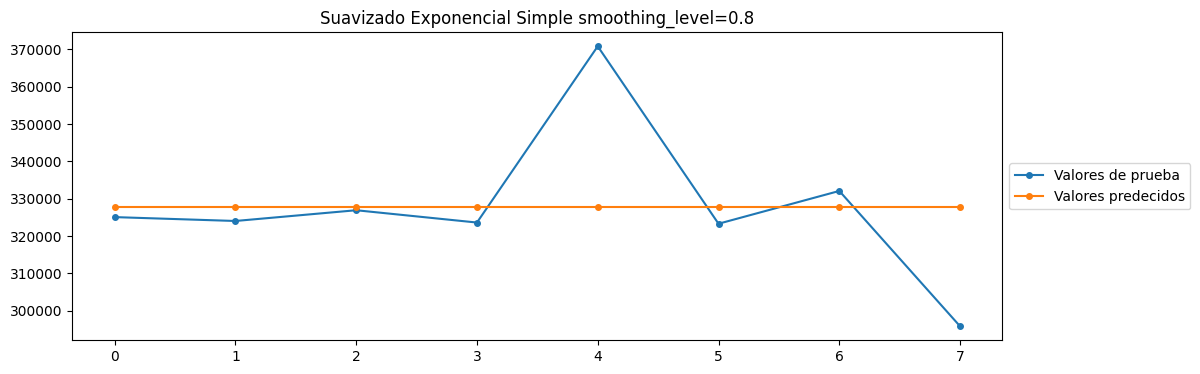

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(test_d[4316], 'o', ls='-', ms=4, label='Valores de prueba')
ax.plot(predict_d[4316].values, 'o', ls='-', ms=4, label='Valores predecidos')
ax.set_title('Suavizado Exponencial Simple smoothing_level=0.8')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

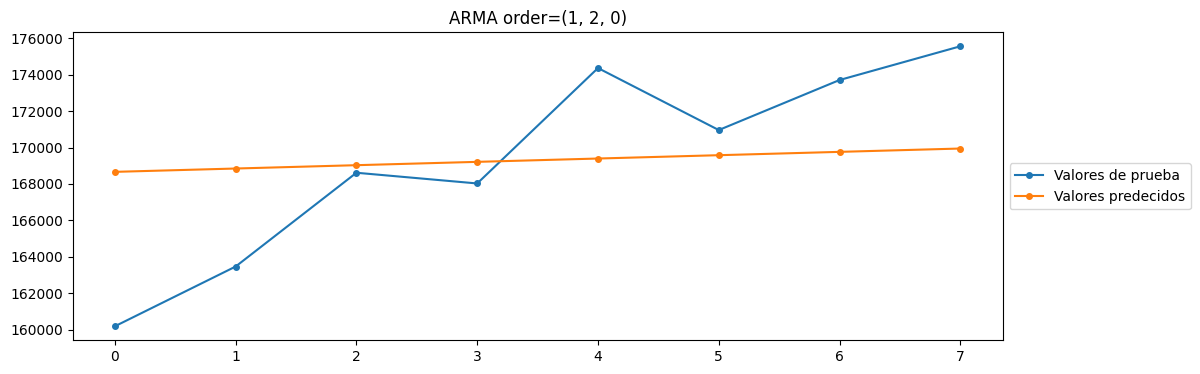

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(test_d[8754], 'o', ls='-', ms=4, label='Valores de prueba')
ax.plot(predict_d[8754].values, 'o', ls='-', ms=4, label='Valores predecidos')
ax.set_title('ARMA order=(1, 2, 0)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

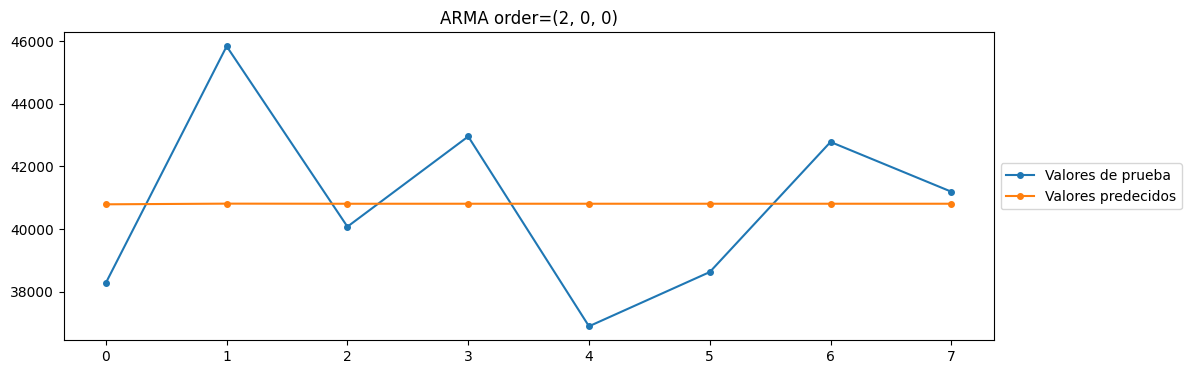

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(test_d[13153], 'o', ls='-', ms=4, label='Valores de prueba')
ax.plot(predict_d[13153].values, 'o', ls='-', ms=4, label='Valores predecidos')
ax.set_title('ARMA order=(2, 0, 0)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

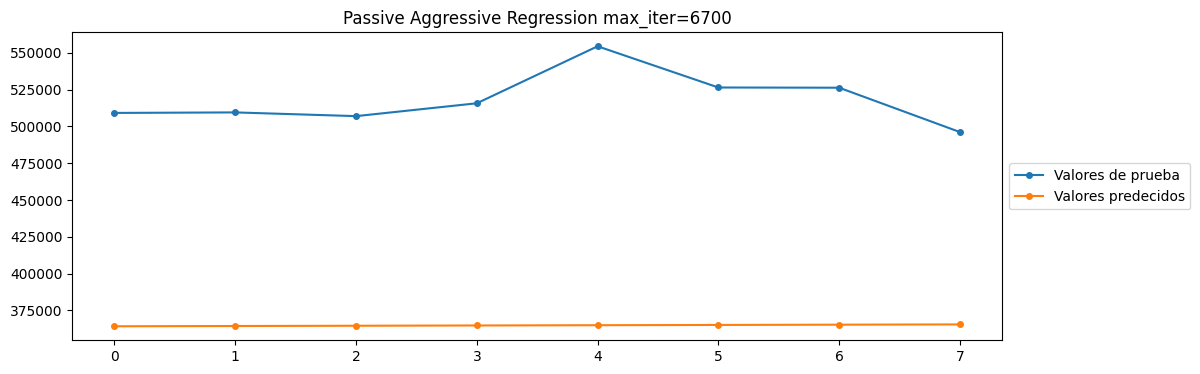

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(test_d[17518], 'o', ls='-', ms=4, label='Valores de prueba')
ax.plot(predict_d[17518], 'o', ls='-', ms=4, label='Valores predecidos')
ax.set_title('Passive Aggressive Regression max_iter=6700')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

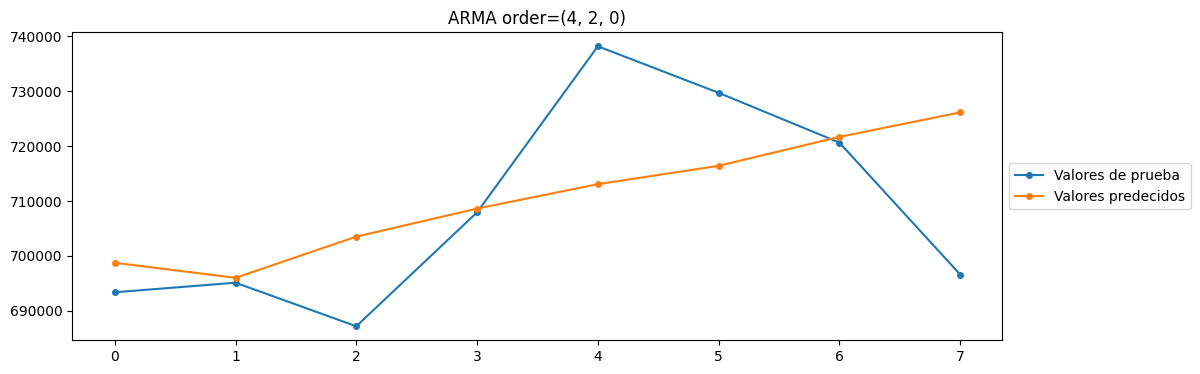

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(test_d[22032], 'o', ls='-', ms=4, label='Valores de prueba')
ax.plot(predict_d[22032].values, 'o', ls='-', ms=4, label='Valores predecidos')
ax.set_title('ARMA order=(4, 2, 0)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [54]:
result_df

,Model,Params,MSE,Dataset
0,Linear Regression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",5.524619e+09,CO2
1,Lasso LARS Regression,"{'alpha': 0.0, 'copy_X': True, 'fit_intercept'...",5.524619e+09,CO2
2,Lasso LARS Regression,"{'alpha': 0.25, 'copy_X': True, 'fit_intercept...",5.524606e+09,CO2
3,Lasso LARS Regression,"{'alpha': 0.5, 'copy_X': True, 'fit_intercept'...",5.524592e+09,CO2
4,Lasso LARS Regression,"{'alpha': 0.75, 'copy_X': True, 'fit_intercept...",5.524579e+09,CO2
...,...,...,...,...
22080,Auto Regressive Moving Average,"order=(9, 5, 0)",4.702577e+12,CO2_abs
22081,Auto Regressive Moving Average,"order=(9, 6, 0)",3.799594e+13,CO2_abs
22082,Auto Regressive Moving Average,"order=(9, 7, 0)",8.676135e+13,CO2_abs
22083,Auto Regressive Moving Average,"order=(9, 8, 0)",1.277920e+15,CO2_abs


In [55]:
result_df = result_df.sort_values("MSE")

In [56]:
save_to_csv("results.csv", result_df)

In [58]:
co2_result_df = result_df.sort_values("MSE")
save_to_csv("CO2_results.csv", co2_regressors)

In [63]:
stochastic_methods = [369833209,
373164864.2,
374107397.3,
387577441.6,
373494973.6,
381227381.5,
384800155.3,
385185260.5,
5524093448,
5524093448,
5524093448,
5524093448,
5524619445,
5524619445,
5524619445,
5524619445]
ai_methods = [386612407,
386612407,
386612407,
386612407,
385417243.6,
385417345.8,
385418526.1,
385418553.2,
374414864.3,
376301628.1,
386221870.2,
387428525.7,
781068951.7,
785247152.3,
788659478.8,
789013014.4]
ttest_rel(stochastic_methods, ai_methods)

TtestResult(statistic=3.7786988210668366, pvalue=0.0018208403463303893, df=15)

In [64]:
stochastic_methods = [
369833209,
373164864.2,
373494973.6,
374107397.3,
381227381.5,
384800155.3,
385185260.5,
386420457.5,
386612407,
387577441.6,
387772558.6,
389833075.2,
391948938.3,
392223425.7,
397435100.1,
399554793.5,
426877781.9,
449455930.4,
500849016.4,
529560587.5,
580916646.7,
715283361.5,
771110833.7,
1164587608,
1257239814,
1425035156,
1455485252,
1645504756,
1760056047,
2940417645,
3075475592,
]
ai_methods = [
374414864.3,
376301628.1,
385417243.6,
385417345.8,
385418526.1,
385418553.2,
385418656.3,
385418662.7,
386221870.2,
386612407,
386612407,
386612407,
386612407,
387428525.7,
396036851.7,
396036851.8,
396036851.8,
396036851.8,
396036851.8,
396036902.1,
396036988.6,
396038588.7,
396038588.8,
396038667.1,
396038733.5,
396038741.2,
409600483.1,
409600510.7,
409600696.7,
409600767.5,
409602722.4,
]
ttest_rel(stochastic_methods, ai_methods)

TtestResult(statistic=3.1696955337051844, pvalue=0.0035012089919609717, df=30)